# Defines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.optimize import minimize
import sympy as sp
rcParams['font.family'] = 'serif'

# Create the DataFrame
data = {
    "Eng. Strain [%]": [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300],
    "Eng. Stress [MPa] (Uniaxial)": [0, 6, 8, 9, 11, 12, 14, 15, 16, 17, 19],
    "Eng. Stress [MPa] (Equibiaxial)": [0, 10, 17, 22, 28, 37, 44, 52, 60, 70, 82],
    "Eng. Stress [MPa] (Planar)": [0, 7, 10, 12, 14, 16, 17, 19, 21, 23, 24],
}

df = pd.DataFrame(data)
df

,Eng. Strain [%],Eng. Stress [MPa] (Uniaxial),Eng. Stress [MPa] (Equibiaxial),Eng. Stress [MPa] (Planar)
0,0,0,0,0
1,30,6,10,7
2,60,8,17,10
3,90,9,22,12
4,120,11,28,14
5,150,12,37,16
6,180,14,44,17
7,210,15,52,19
8,240,16,60,21
9,270,17,70,23


In [2]:
print(df.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
Eng. Strain [%] & Eng. Stress [MPa] (Uniaxial) & Eng. Stress [MPa] (Equibiaxial) & Eng. Stress [MPa] (Planar) \\
\midrule
0 & 0 & 0 & 0 \\
30 & 6 & 10 & 7 \\
60 & 8 & 17 & 10 \\
90 & 9 & 22 & 12 \\
120 & 11 & 28 & 14 \\
150 & 12 & 37 & 16 \\
180 & 14 & 44 & 17 \\
210 & 15 & 52 & 19 \\
240 & 16 & 60 & 21 \\
270 & 17 & 70 & 23 \\
300 & 19 & 82 & 24 \\
\bottomrule
\end{tabular}



In [3]:
def W(𝜆1, 𝜆2, 𝜆3, mu1, mu2, a1, a2):
    ret  = 2*mu1/a1**2 * (𝜆1**a1 + 𝜆2**a1 + 𝜆3**a1 - 3)
    ret += 2*mu2/a2**2 * (𝜆1**a2 + 𝜆2**a2 + 𝜆3**a2 - 3)
    return ret

def P_OG_uniaxial(𝜆, mu1, mu2, a1, a2):
    ret  = 2*mu1/a1 * (𝜆**(a1-1) - 𝜆**(-a1/2 - 1))
    ret += 2*mu2/a2 * (𝜆**(a2-1) - 𝜆**(-a2/2 - 1))
    return ret

def P_OG_equibiaxial(𝜆, mu1, mu2, a1, a2):
    ret  = 2*mu1/a1 * (𝜆**(a1-1) - 𝜆**(-2*a1 - 1))
    ret += 2*mu2/a2 * (𝜆**(a2-1) - 𝜆**(-2*a2 - 1))
    return ret

def P_OG_planar(𝜆, mu1, mu2, a1, a2):
    ret  = 2*mu1/a1 * (𝜆**(a1-1) - 𝜆**(-a1 - 1))
    ret += 2*mu2/a2 * (𝜆**(a2-1) - 𝜆**(-a2 - 1))
    return ret

# Tasks

### Task 1. - Plotting experimental data

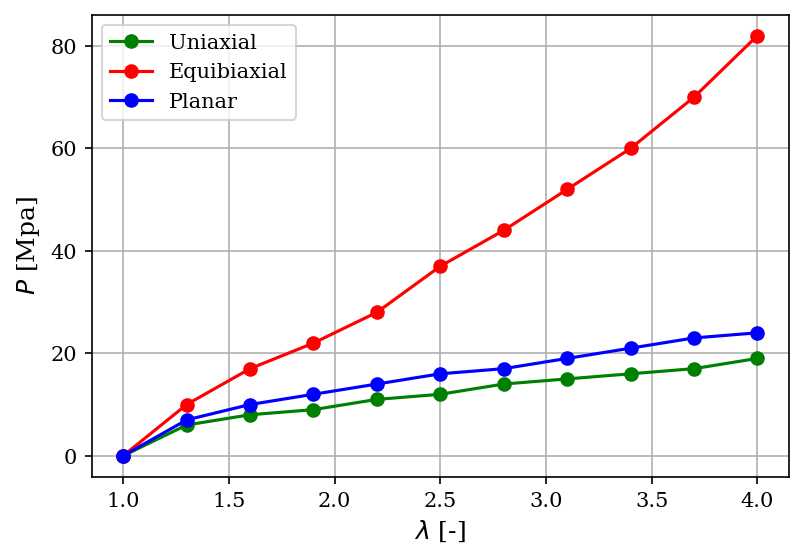

In [4]:
ε = df["Eng. Strain [%]"].to_numpy()/100
𝜆 = ε + 1

P_uniaxial    = df["Eng. Stress [MPa] (Uniaxial)"   ].to_numpy() 
P_equibiaxial = df["Eng. Stress [MPa] (Equibiaxial)"].to_numpy()
P_planar      = df["Eng. Stress [MPa] (Planar)"     ].to_numpy()


plt.figure(figsize=(6,4),dpi=150)
plt.plot(𝜆,P_uniaxial,marker='o',label='Uniaxial',color='green')
plt.plot(𝜆,P_equibiaxial,marker='o',label='Equibiaxial',color='red')
plt.plot(𝜆,P_planar,marker='o',label='Planar',color='blue')
plt.grid()
plt.xlabel(r'$\lambda$ [-]',fontsize=12)
plt.ylabel(r'$P$ [Mpa]',fontsize=12)
plt.legend()

### Task 2. - Fitting model only to the unaxial data

In [5]:
def Q_uniaxial(params):
    mu1, mu2, a1, a2 = params
    # [:1] to avoid 0 divide
    # the model provide P=0 for 𝜆=0
    pred = P_OG_uniaxial(𝜆[1:],mu1, mu2, a1, a2)
    real = P_uniaxial[1:]
    n = P_uniaxial.shape[0]
    
    return (np.sum(((real - pred)/real)**2)/n)**(1/2)

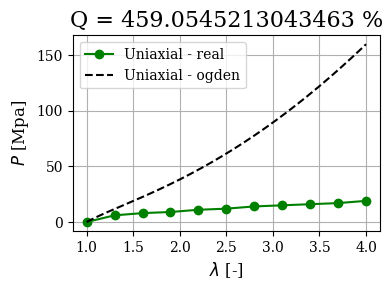

In [6]:
params = 10, 5, 3, 3

plt.figure(figsize=(4,3),dpi=100)
plt.plot(𝜆,P_uniaxial,marker='o',label='Uniaxial - real',color='green')
𝜆_range = np.linspace(1,4,500)
plt.plot(𝜆_range,P_OG_uniaxial(𝜆_range,*params),color='black',label='Uniaxial - ogden',ls='--')
plt.grid()
plt.xlabel(r'$\lambda$ [-]',fontsize=12)
plt.ylabel(r'$P$ [Mpa]',fontsize=12)
plt.legend()
plt.title(f'Q = {Q_uniaxial(params)*100} %',fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
def constraint(params):
    mu1, mu2, a1, a2 = params
    return mu1 + mu2 - 1

constraints = [
    {'type': 'ineq', 'fun': constraint},  
]

result = minimize(
    Q_uniaxial, 
    params, 
    method='BFGS',
    constraints=constraints)

print(f'Q_uniaxial = {result.fun*100} [%]')
print(f'params = {result.x}')

Q_uniaxial = 3.270083891729716 [%]
params = [10.71992575  0.04956515 -3.2772214   4.57758998]


C:\Users\Zsoci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minimize.py:576: RuntimeWarning: Method BFGS cannot handle constraints.
  warn('Method %s cannot handle constraints.' % method,


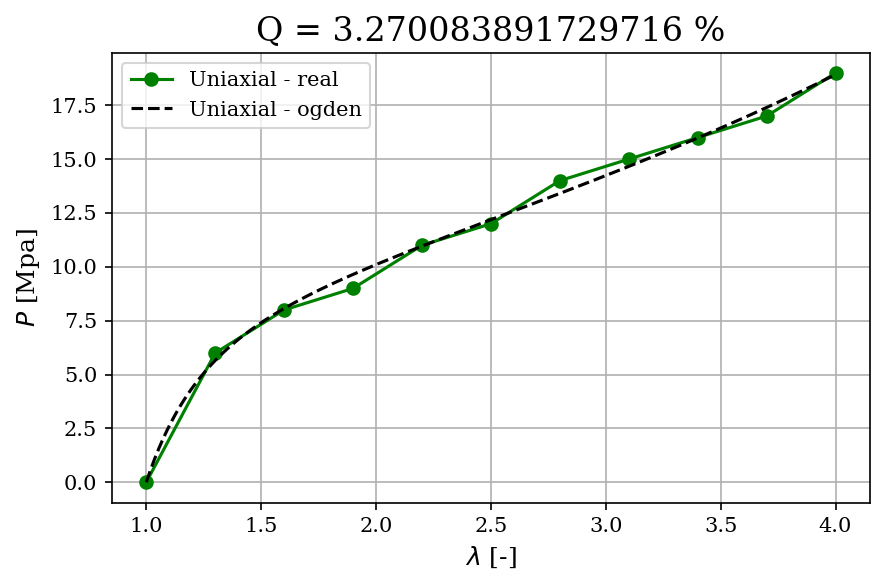

In [8]:
params = result.x

plt.figure(figsize=(6,4),dpi=150)
plt.plot(𝜆,P_uniaxial,marker='o',label='Uniaxial - real',color='green')
𝜆_range = np.linspace(1,4,500)
plt.plot(𝜆_range,P_OG_uniaxial(𝜆_range,*params),color='black',label='Uniaxial - ogden',ls='--')
plt.grid()
plt.xlabel(r'$\lambda$ [-]',fontsize=12)
plt.ylabel(r'$P$ [Mpa]',fontsize=12)
plt.legend()
plt.title(f'Q = {Q_uniaxial(params)*100} %',fontsize=16)
plt.tight_layout()
plt.show()

### Task 3. - Equibiaxial and planar quality functions

In [9]:
def Q_equibiaxial(params):
    mu1, mu2, a1, a2 = params
    # [:1] to avoid 0 divide
    # the model provide P=0 for 𝜆=0
    pred = P_OG_equibiaxial(𝜆[1:],mu1, mu2, a1, a2)
    real = P_equibiaxial[1:]
    n = P_equibiaxial.shape[0]
    
    return (np.sum(((real - pred)/real)**2)/n)**(1/2)

def Q_planar(params):
    mu1, mu2, a1, a2 = params
    # [:1] to avoid 0 divide
    # the model provide P=0 for 𝜆=0
    pred = P_OG_planar(𝜆[1:],mu1, mu2, a1, a2)
    real = P_planar[1:]
    n = P_planar.shape[0]
    
    return (np.sum(((real - pred)/real)**2)/n)**(1/2)

In [10]:
print(f'Q_equibiaxial = {Q_equibiaxial(params)*100} %')
print(f'Q_planar = {Q_planar(params)*100} %')

Q_equibiaxial = 7703.947754246242 %
Q_planar = 306.5815214494574 %


### Task 4. - Plotting solutions

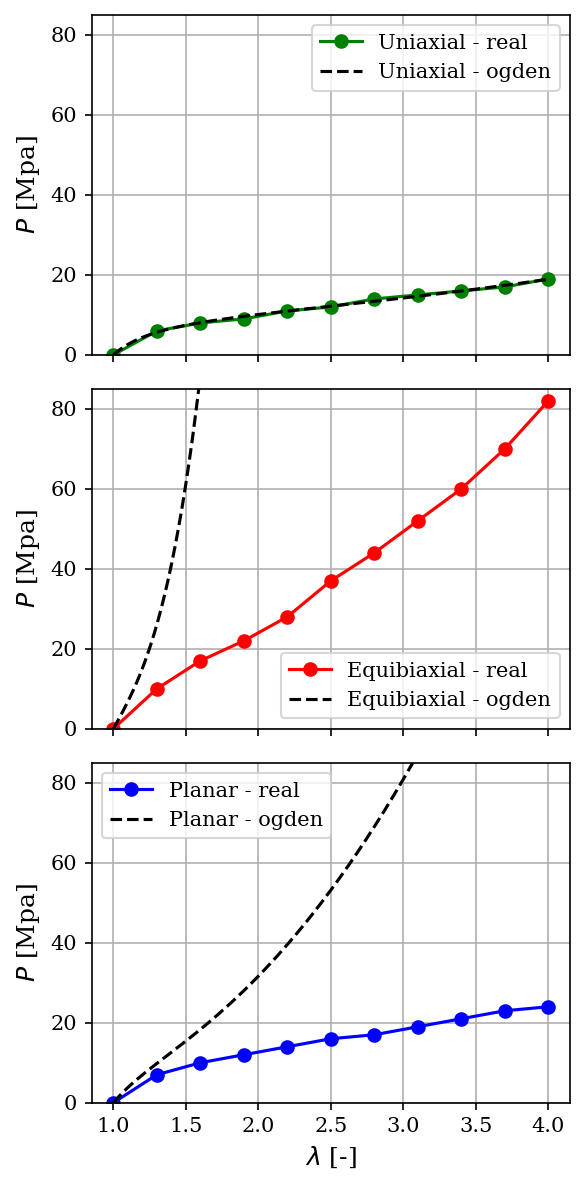

In [11]:
fig, ax = plt.subplots(3,figsize=(4,8),dpi=150,sharex=True,sharey=True)

𝜆_range = np.linspace(1,4,500)
ax[0].plot(𝜆,P_uniaxial,marker='o',label='Uniaxial - real',color='green')
ax[0].plot(𝜆_range,P_OG_uniaxial(𝜆_range,*params),color='black',label='Uniaxial - ogden',ls='--')
ax[0].grid()
ax[0].set_ylim(0,85)
ax[0].legend()
ax[0].set_ylabel(r'$P$ [Mpa]',fontsize=12)
ax[1].plot(𝜆,P_equibiaxial,marker='o',label='Equibiaxial - real',color='red')
ax[1].plot(𝜆_range,P_OG_equibiaxial(𝜆_range,*params),color='black',label='Equibiaxial - ogden',ls='--')
ax[1].grid()
ax[1].set_ylim(0,85)
ax[1].legend()
ax[1].set_ylabel(r'$P$ [Mpa]',fontsize=12)
ax[2].plot(𝜆,P_planar,marker='o',label='Planar - real',color='blue')
ax[2].plot(𝜆_range,P_OG_planar(𝜆_range,*params),color='black',label='Planar - ogden',ls='--')
ax[2].grid()
ax[2].set_ylim(0,85)
ax[2].legend()
ax[2].set_ylabel(r'$P$ [Mpa]',fontsize=12)
ax[2].set_xlabel(r'$\lambda$ [-]',fontsize=12)
plt.tight_layout()
plt.show()

### Task 5. - Simultanious fitting to all measurements

In [12]:
def Q(params):
    return (Q_uniaxial(params) + Q_equibiaxial(params) + Q_planar(params))/3

In [13]:
def constraint(params):
    mu1, mu2, a1, a2 = params
    return mu1 + mu2 - 1

constraints = [
    {'type': 'ineq', 'fun': constraint},  
]

result = minimize(
    Q, 
    params, 
    method='BFGS',
    constraints=constraints,
)

print(f'Q = {result.fun*100} [%]')
params = result.x
print(f'params = {params}')

Q = 4.204375992236135 [%]
params = [ 3.18596983  4.62213918 -1.48228961  1.77455216]


In [14]:
print(Q_uniaxial(params)*100,'[%]')
print(Q_equibiaxial(params)*100,'[%]')
print(Q_planar(params)*100,'[%]')

6.414037738579216 [%]
2.196516422902834 [%]
4.002573815226355 [%]


### Task 6. - Plotting solutions

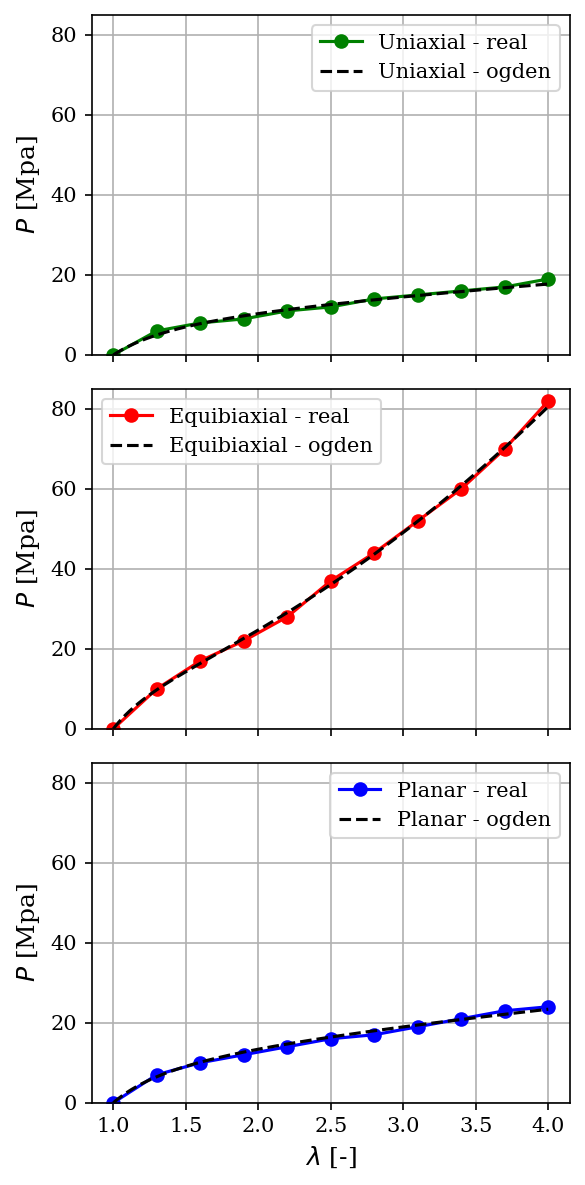

In [15]:
fig, ax = plt.subplots(3,figsize=(4,8),dpi=150,sharex=True,sharey=True)
𝜆_range = np.linspace(1,4,500)
ax[0].plot(𝜆,P_uniaxial,marker='o',label='Uniaxial - real',color='green')
ax[0].plot(𝜆_range,P_OG_uniaxial(𝜆_range,*params),color='black',label='Uniaxial - ogden',ls='--')
ax[0].grid()
ax[0].set_ylim(0,85)
ax[0].legend()
ax[0].set_ylabel(r'$P$ [Mpa]',fontsize=12)
ax[1].plot(𝜆,P_equibiaxial,marker='o',label='Equibiaxial - real',color='red')
ax[1].plot(𝜆_range,P_OG_equibiaxial(𝜆_range,*params),color='black',label='Equibiaxial - ogden',ls='--')
ax[1].grid()
ax[1].set_ylim(0,85)
ax[1].legend()
ax[1].set_ylabel(r'$P$ [Mpa]',fontsize=12)
ax[2].plot(𝜆,P_planar,marker='o',label='Planar - real',color='blue')
ax[2].plot(𝜆_range,P_OG_planar(𝜆_range,*params),color='black',label='Planar - ogden',ls='--')
ax[2].grid()
ax[2].set_ylim(0,85)
ax[2].legend()
ax[2].set_ylabel(r'$P$ [Mpa]',fontsize=12)
ax[2].set_xlabel(r'$\lambda$ [-]',fontsize=12)
plt.tight_layout()
plt.show()

### Task 7. - Determine of k

The displacement field is given in the with the components of the material displacement
field, like

$$
\boldsymbol{U} = 
\begin{bmatrix}
    5 - 3kX_1\\
    1 + 0.3X_1 + 0.5X_2 \\
    3
\end{bmatrix}
$$.

From this we can determine the displacement gradient as

$$
\boldsymbol{K} = \frac{\text{d}\boldsymbol{U}}{\text{d}\boldsymbol{X}} = 
\begin{bmatrix}
    -3k & 0 & 0 \\
    0.3 & 0.5 & 0 \\
    0 & 0 & 0 \\
\end{bmatrix}
$$.

The deformation gradient can be calculated as

$$
\boldsymbol{F} = \boldsymbol{K} + \boldsymbol{I} = 
\begin{bmatrix}
    1-3k & 0 & 0 \\
    0.3 & 1.5 & 0 \\
    0 & 0 & 1 \\
\end{bmatrix}
$$.

The volume change can be calculated as the determinant of the deformation gradient

$$
J = \text{det}\boldsymbol{F} = (1-3k)\cdot 1.5
$$

If there is incompressible case, the volume change should be equal with 1, therefore:

$$
(1-3k)\cdot 1.5 = 1
$$
$$
k = \frac{1}{9}
$$

In [16]:
k = 1/9

F = np.array([
    [1-3*k,   0, 0],
    [  0.3, 1.5, 0],
    [    0,   0, 1]
])

print(F)

[[0.66666667 0.         0.        ]
 [0.3        1.5        0.        ]
 [0.         0.         1.        ]]


We can see that $\boldsymbol{F}$ is dependent from the material coordinates, which means the deformation is isotropic.

### Task 8. - Principal streches

We know that by the deformation gradient we can determine the left Cauchy-Green deformation tensor as

$$
\boldsymbol{b} = \boldsymbol{F}\boldsymbol{F}^T
$$

In [17]:
b = F@F.T

sp.print_latex(sp.Matrix(b))

\left[\begin{matrix}0.444444444444445 & 0.2 & 0\\0.2 & 2.34 & 0\\0 & 0 & 1.0\end{matrix}\right]


The eigendecomposition of the Cauchy-Green tensor looks like

$$
\boldsymbol{b} = \sum_{i=1}^3 \mu_i \cdot \boldsymbol{n_i} \otimes \boldsymbol{n_i} =  \sum_{i=1}^3 \lambda_i^2 \cdot \boldsymbol{n_i} \otimes \boldsymbol{n_i}
$$,

where $\lambda_i$ are the principal streches and $\boldsymbol{n_i}$ are the principal Eulerian directions

In [18]:
(μ1,μ2,μ3), (n1,n2,n3) = np.linalg.eig(b)

(𝜆1,𝜆2,𝜆3) = (μ1**(1/2),μ2**(1/2),μ3**(1/2))


print(𝜆1,𝜆2,𝜆3)
sp.print_latex(sp.Matrix(n1).T.evalf(6))
sp.print_latex(sp.Matrix(n2).T.evalf(6)) 
sp.print_latex(sp.Matrix(n3).T.evalf(6)) 

0.650824305915314 1.5365129896210752 1.0
\left[\begin{matrix}-0.994599 & -0.103797 & 0\end{matrix}\right]
\left[\begin{matrix}0.103797 & -0.994599 & 0\end{matrix}\right]
\left[\begin{matrix}0 & 0 & 1.0\end{matrix}\right]


### Task 9. - Cauchy stress tensor and Mises Equivalent stress

In the coordinate system of the principal Eulerian directions, the Cauchy stress tensor can be expressed as

$$
\boldsymbol{\sigma} = \sum_{i=1}^3 \sigma_i \cdot \boldsymbol{n_i} \otimes \boldsymbol{n_i}
$$

where the principal stress components can be calculated from the principal streches as

$$
\sigma_i = \frac{1}{J} \lambda_i \frac{\partial W}{\partial \lambda_i} = \lambda_i \frac{\partial W}{\partial \lambda_i}.
$$

The second term of the product can be calculated from the given strain energy potential function as

$$
\frac{\partial W}{\partial \lambda_i} = \sum_{i=1}^2 \frac{2\mu_k}{\alpha_k^2}\alpha_k\lambda_i^{\alpha_k-1} = 
\sum_{i=1}^2 \frac{2\mu_k}{\alpha_k}\lambda_i^{\alpha_k-1}
$$


In [19]:
mu1, mu2, a1, a2 = params

dWd𝜆1 = 2*mu1/a1 * 𝜆1**(a1-1) + 2*mu2/a2 * 𝜆1**(a2-1)
dWd𝜆2 = 2*mu1/a1 * 𝜆2**(a1-1) + 2*mu2/a2 * 𝜆2**(a2-1)
dWd𝜆3 = 2*mu1/a1 * 𝜆3**(a1-1) + 2*mu2/a2 * 𝜆3**(a2-1)

# tmp = np.array([
#     [𝜆1*dWd𝜆1,0,0],
#     [0,𝜆2*dWd𝜆2,0],
#     [0,0,𝜆3*dWd𝜆3]
# ])

tmp = 𝜆1*dWd𝜆1 * np.outer(n1,n1) + 𝜆2*dWd𝜆2 * np.outer(n2,n2) + 𝜆3*dWd𝜆3 * np.outer(n3,n3)


s = tmp - 1/3*np.trace(tmp)*np.eye(3)
p = -s[2,2] * np.eye(3)
sig = s + p

sp.print_latex(sp.Matrix(s).evalf(5))
sp.print_latex(sp.Matrix(p).evalf(5))
sp.print_latex(sp.Matrix(sig).evalf(5))

\left[\begin{matrix}-6.9058 & -1.5056 & 0\\-1.5056 & 7.3637 & 0\\0 & 0 & -0.45787\end{matrix}\right]
\left[\begin{matrix}0.45787 & 0 & 0\\0 & 0.45787 & 0\\0 & 0 & 0.45787\end{matrix}\right]
\left[\begin{matrix}-6.4479 & -1.5056 & 0\\-1.5056 & 7.8215 & 0\\0 & 0 & 0\end{matrix}\right]


The Mises equivalent stress can be expressed as

$$
\sigma_{vM} = \sqrt{\frac{3}{2}\boldsymbol{s}:\boldsymbol{s}}
$$

In [20]:
sig_vM = np.sqrt(3/2 * np.sum(s**2))

sig_vM

12.648525122821695

In [21]:
params

array([ 3.18596983,  4.62213918, -1.48228961,  1.77455216])